In [6]:
from google.colab import files
uploaded = files.upload()

Saving Covid_19_cases4.csv to Covid_19_cases4 (2).csv


Import Necessary Libraries:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Assuming you've uploaded the dataset file (e.g., Covid_19_cases4.csv) to your Colab environment:

In [8]:
# Load the dataset
data = pd.read_csv('Covid_19_cases4.csv')

# Display the first few rows to inspect the data
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


You can perform data cleaning and preprocessing as needed. Here's an example of how to handle missing values and convert date columns:

In [9]:
# Check for missing values
data.isnull().sum()

# Handle missing values (e.g., fill with zeros)
data = data.fillna(0)

# Convert the 'Date' column to a datetime object
# Assuming 'Date' is the correct column name for the date in your DataFrame
data['Date'] = pd.to_datetime(data['dateRep'], format='%d-%m-%Y')




Data Analysis and Visualization:
Use Python libraries like Matplotlib and Seaborn for data visualization. Below is an example of a line chart showing the daily cases over time:

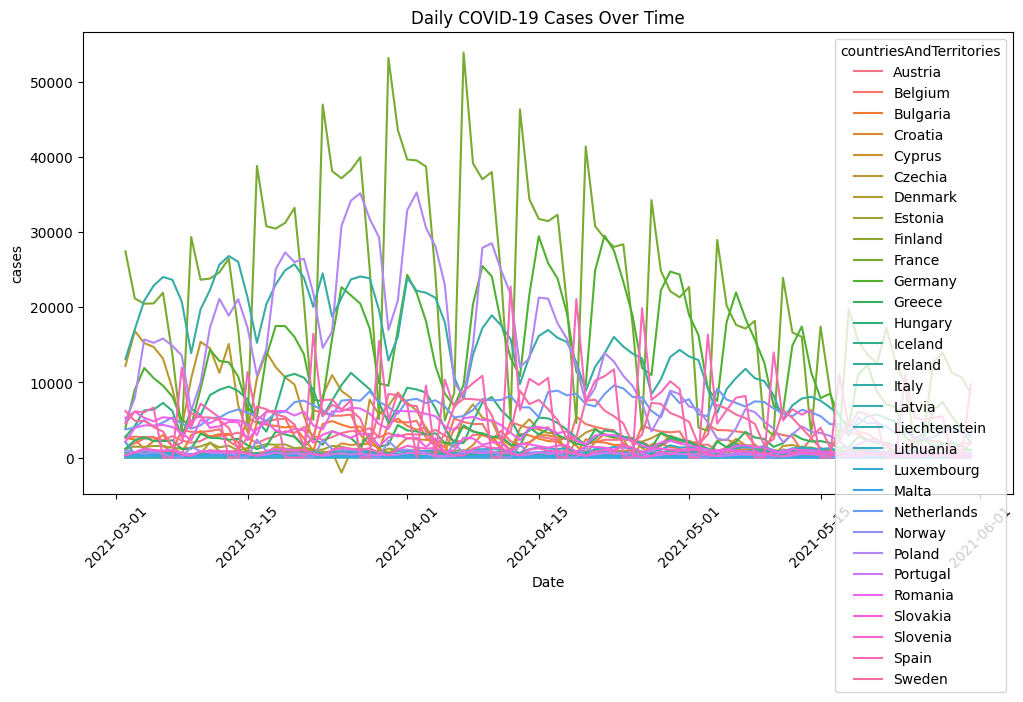

In [10]:
# Create a line chart for daily cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='cases', data=data, hue='countriesAndTerritories')
plt.title('Daily COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('cases')
plt.xticks(rotation=45)
plt.show()

[IBM Visualizaion](https://us3.ca.analytics.ibm.com/bi/?perspective=dashboard&pathRef=.my_folders%2FDAC_Phase3%2FDAC_Phase3&action=view&mode=dashboard&subView=model0000018b41b33106_00000000)

Mean Values and the Standard Deviations:

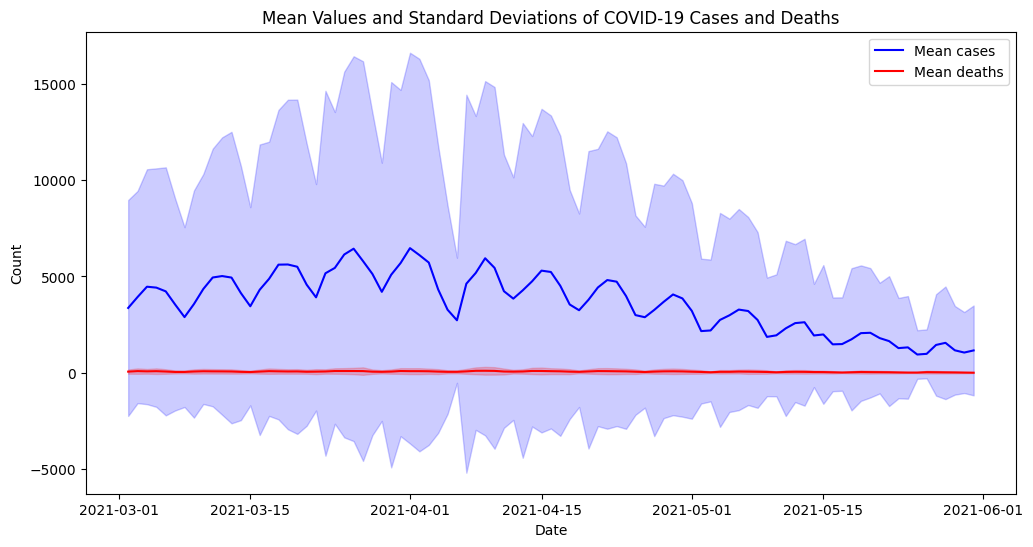

In [11]:
# Calculate mean values and standard deviations
mean_cases = data.groupby('Date')['cases'].mean()
mean_deaths = data.groupby('Date')['deaths'].mean()
std_cases = data.groupby('Date')['cases'].std()
std_deaths = data.groupby('Date')['deaths'].std()

# Create a line chart for mean values
plt.figure(figsize=(12, 6))
plt.plot(mean_cases.index, mean_cases, label='Mean cases', color='blue')
plt.plot(mean_deaths.index, mean_deaths, label='Mean deaths', color='red')

# Create a shaded area chart for standard deviations
plt.fill_between(std_cases.index, mean_cases - std_cases, mean_cases + std_cases, alpha=0.2, color='blue')
plt.fill_between(std_deaths.index, mean_deaths - std_deaths, mean_deaths + std_deaths, alpha=0.2, color='red')

# Add labels and legends
plt.title('Mean Values and Standard Deviations of COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Show the chart
plt.show()

Correlation between Cases and Deaths:

Correlation between cases and deaths: 0.77
Mean Cases: 3661.01
Standard Deviation Cases: 6490.51
Mean Deaths: 65.29
Standard Deviation Deaths: 113.96


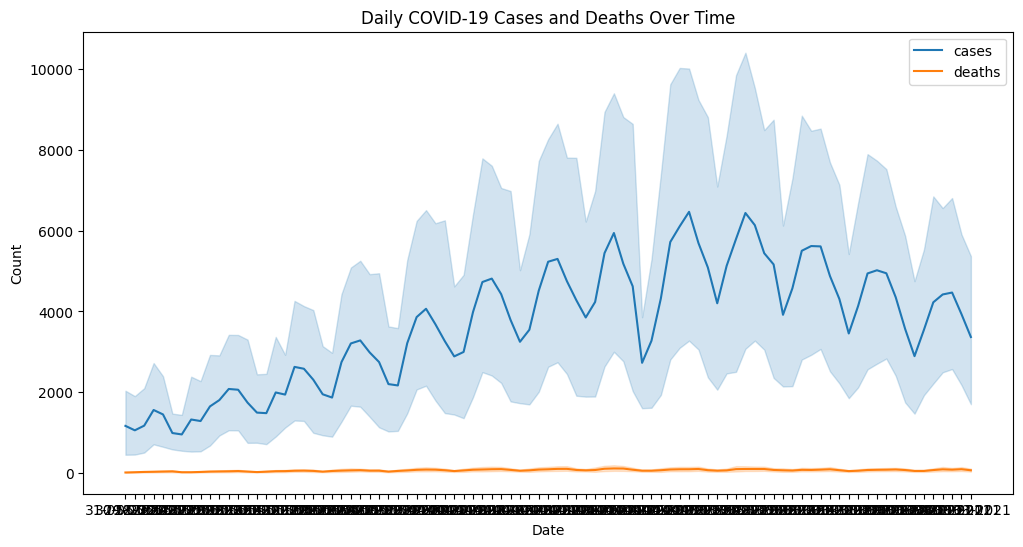

In [12]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Create a line chart for daily cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dateRep', y='cases', data=data, label='cases')
sns.lineplot(x='dateRep', y='deaths', data=data, label='deaths')
plt.title('Daily COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Calculate and display correlations
correlation_cases_deaths = data['cases'].corr(data['deaths'])
print(f"Correlation between cases and deaths: {correlation_cases_deaths:.2f}")

# Identify trends and variations
mean_cases = data['cases'].mean()
std_cases = data['cases'].std()
mean_deaths = data['deaths'].mean()
std_deaths = data['deaths'].std()

print(f"Mean Cases: {mean_cases:.2f}")
print(f"Standard Deviation Cases: {std_cases:.2f}")
print(f"Mean Deaths: {mean_deaths:.2f}")
print(f"Standard Deviation Deaths: {std_deaths:.2f}")

# Show the plot
plt.show()


[IBM Visualization:](https://us3.ca.analytics.ibm.com/bi/?perspective=explore&pathRef=.my_folders%2FDAC_Phase4&subView=model0000018b65dfa9a4_00000001)